# Regression Analysis
* Author: Johannes Maucher
* Last Update: 2017-09-26

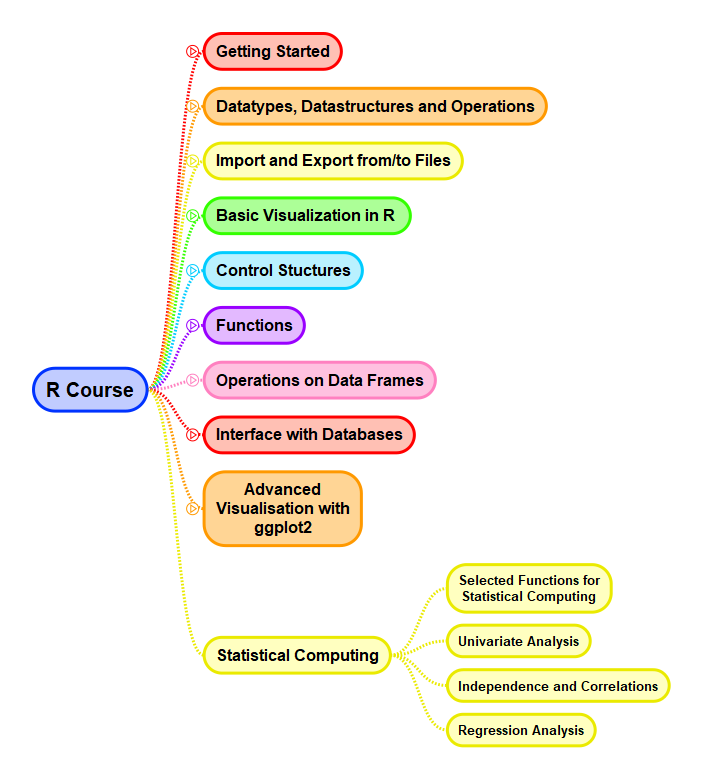

In [1]:
library("IRdisplay")
display_png(file="../../../Pics/DSRstatistical.PNG",width=900) 

    
Regression Analysis deals with the prediction of a numeric output variable $y$ from $k$ input variables $x_1,x_2,\ldots,x_{k}$. For a given set $T$ of $N$ observations
$$T=\left\{[(x_{i,1},x_{i,2},\ldots,x_{i,k}), \, y_i] \quad | \quad i \in [1,\ldots,N]\right\},$$
each described by the values of the input variables $x_{i,1},x_{i,2},\ldots,x_{i,k}$ and the value of the corresponding output variable $y_i$, **Ordinary Least-Square Regression (OLS)** calculates a model (a function f), which defines a linear mapping from the input variables to the output variable of the form:
$$ \hat{y} = f(x_1,x_2,\ldots,x_{k}) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_k x_k$$
Once this model is determined, it can be applied to predict for arbitrary vectors of input variables $x_1,x_2,\ldots,x_{k}$ the corresponding output $\hat{y}$.

**Note:** In the context of Regression Analysis and ANOVA the *input variables* are called *predictor variables* and the *output variable* is called the *response variable*. However, here we apply the more general terms of input- and output-variables, respectively.  



The model $f$ is infered inductively from the set $T$ of $N$ observations, by minimizing the *sum of squared errors* between the observed output $y_i$ and the prediction of the model $\hat{y_i}$ 
$$ \sum\limits_{i=1}^N (y_i - \hat{y}_i)^2 = \sum\limits_{i=1}^N (y_i - (\beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \ldots + \beta_k x_{i,k}))^2 = \sum\limits_{i=1}^N \epsilon_i^2.$$


With
$$\mathbf{\hat{y}}=\left(
\begin{array}{c}
\hat{y}_1 \\ 
\hat{y}_2 \\ 
\vdots \\ 
\hat{y}_N\\ 
\end{array} 
\right),
\quad
X=
\left(
\begin{array}{ccccc}
1 & x_{1,1} & x_{1,2} & \cdots  & x_{1,k} \\
1 & x_{2,1} & x_{2,2} & \cdots  & x_{2,k} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{N,1} & x_{N,2} & \cdots  & x_{N,k} \\
\end{array}
\right),
\quad
\mbox{and}
\quad
\boldsymbol{\beta}=\left(
\begin{array}{c}
\beta_0 \\ 
\beta_1 \\ 
\vdots \\ 
\beta_k\\ 
\end{array} 
\right).
$$

OLS regression calculates the coefficients of $\boldsymbol{\beta}$, such that 

$$\mathbf{\hat{y}=X \cdot \boldsymbol{\beta}},$$

yields the minimum sum of sauared error $$\sum\limits_{i=1}^N (y_i-\hat{y}_i)^2 = \sum\limits_{i=1}^N \epsilon_i^2.$$

The solution for this problem is:

$$\boldsymbol{\beta} = (X^T X)^{-1} X^T \cdot \mathbf{y}$$

<a id='simpleLinReg'></a>
## Simple linear Regression
Simple linear regression refers to the case of only one input-variable, i.e. $k=1$ and 
$$ \hat{y} = f(x_1) = \beta_0 + \beta_1 x_1 $$

### Load and visualize data for simple linear regression

In [2]:
heartrate<-read.csv(file="../data/HeartRate.txt", header=T,sep=" ",stringsAsFactors = TRUE)
str(heartrate)
heartrate

'data.frame':	30 obs. of  3 variables:
 $ Id       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Speed    : num  4.5 5 4.5 5.25 4.5 4.75 5 5.5 4.5 5.25 ...
 $ Heartrate: num  155 167 164 161 149 ...


Id,Speed,Heartrate
1,4.50,155.15
2,5.00,166.68
3,4.50,164.37
4,5.25,160.82
5,4.50,148.51
6,4.75,169.83
7,5.00,188.01
8,5.50,187.90
9,4.50,157.96
10,5.25,178.29


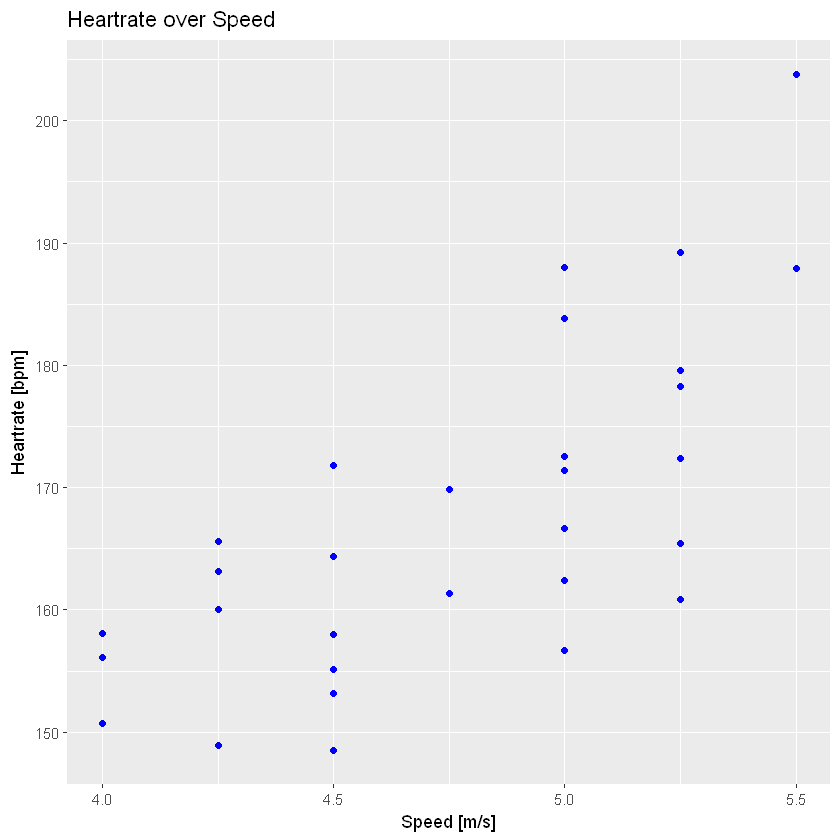

In [3]:
library(ggplot2)
ggplot(data=heartrate) + 
geom_point(aes(x=Speed,y=Heartrate),colour='blue')+
labs(title="Heartrate over Speed",y="Heartrate [bpm]", x="Speed [m/s]")

### Calculate the regression model

In [4]:
(linFit<-lm(Heartrate ~ Speed, data=heartrate))


Call:
lm(formula = Heartrate ~ Speed, data = heartrate)

Coefficients:
(Intercept)        Speed  
      67.68        20.93  


In [5]:
linFit$coefficients

(Intercept)       Speed 
   67.68008    20.93117

The coefficient for speed indicates, that for every speed-increase of 1 m/s the heartrate increases by more than 20 bpm.

### Visualize regression model

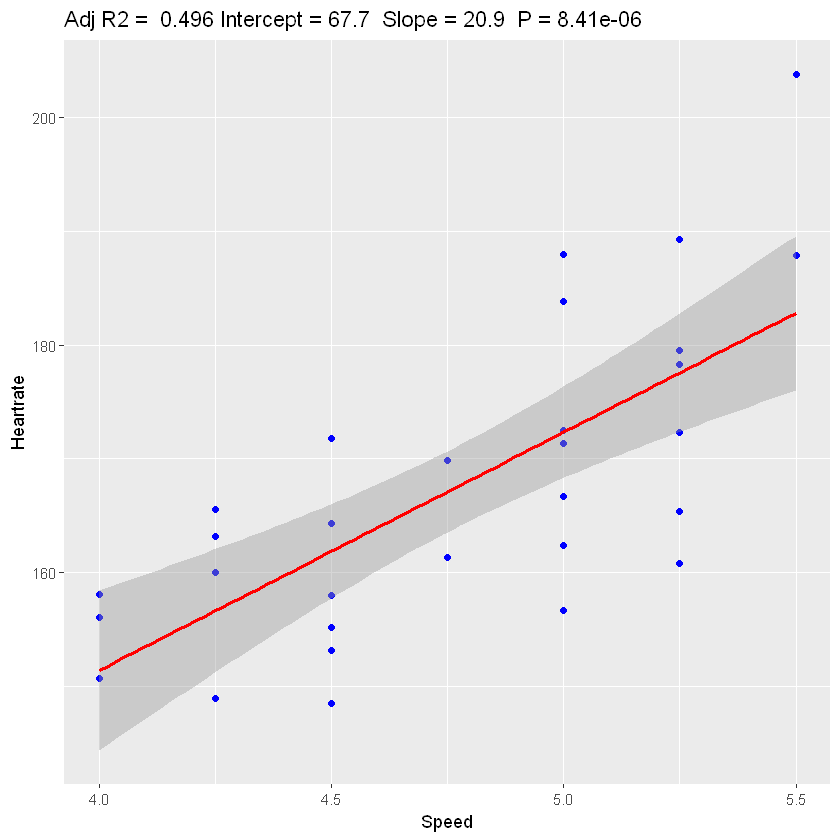

In [6]:
ggplot(data=heartrate, aes(x=Speed, y=Heartrate)) +
geom_point(color="blue")+
geom_smooth(method=lm , color="red", se=T)+
labs(title = paste("Adj R2 = ",signif(summary(linFit)$adj.r.squared, 3),
                     "Intercept =",signif(linFit$coef[[1]],3 ),
                     " Slope =",signif(linFit$coef[[2]], 3),
                     " P =",signif(summary(linFit)$coef[2,4], 3)))

### Summary Report

In [7]:
summary(linFit)


Call:
lm(formula = Heartrate ~ Speed, data = heartrate)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.7487  -6.4786   0.4527   6.1664  21.0085 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    67.68      18.43   3.672  0.00101 ** 
Speed          20.93       3.85   5.437 8.41e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.522 on 28 degrees of freedom
Multiple R-squared:  0.5135,	Adjusted R-squared:  0.4962 
F-statistic: 29.56 on 1 and 28 DF,  p-value: 8.415e-06


### Calculate Regression Parameters step by step
In order to understand the parameters returned by R's *lm()*-function and listed in the *summary()*-report, this subsection describes how these parameters are calculated. 

Note that all parameters can also be calculated as shown in subsection [Multiple Linear Regression](#multisteps), since *Multiple Linear Regression* is the more general case, which includes the special case *Simple Linear Regression*.

**Residuals:** This part plots the quartiles of the residuals $\epsilon_i=y_i-\hat{y}_i$ between the observed output variable $y_i$ and the predicted output $\hat{y}_i$ for all $N$ observations. Observed -, predicted- and residual values are arranged in the following dataframe. 

In [8]:
linFitDF<-data.frame(observed=heartrate$Heartrate,predicted=fitted(linFit),residual=residuals(linFit))
head(linFitDF)

observed,predicted,residual
155.15,161.8704,-6.720354
166.68,172.3359,-5.655940
164.37,161.8704,2.499646
160.82,177.5687,-16.748733
148.51,161.8704,-13.360354
169.83,167.1031,2.726853


The *summary()*-report contains the quartiles of the residuals. They are calculated as follows:

In [9]:
quantile(residuals(linFit))

0%         25%         50%         75%        100% 
-16.7487330  -6.4785525   0.4526635   6.1664475  21.0084741

**Coefficients:** The estimated coefficients of the linear equation. Intercept is the estimator for the constant $\beta_0$. For all other coefficients the estimated coefficient is identified by the name of the input-variable (here only *Speed*) to which it belongs. The confidence for an estimated coefficient $\beta_j$ can be calculated from the standard error and the corresponding t-value (see e.g. [https://en.wikipedia.org/wiki/Simple_linear_regression#Normality_assumption](https://en.wikipedia.org/wiki/Simple_linear_regression#Normality_assumption)). The **standard error** for $\beta_j, \, j \in \{1,\ldots,k\}$ is: 
$$s_{\beta_j}= \sqrt{\frac{\frac{1}{n-(1+k)}\sum\limits_{i=1}^{N} \epsilon_i}{\sum\limits_{i=1}^{N}(x_{i,j}-\overline{x}_j)^2}},$$
where $x_{i,j}$ is the $i.th$ observation of the $j.th$ input-variable and $\overline{x}_j$ is the mean of the $j.th$ input-variable.

The standard error for the estimated intercept $\beta_0$ in the case of simple linear regression ($k=1$) is:
$$s_{\beta_0}= s_{\beta_1} \sqrt{\frac{1}{N}\sum\limits_{i=1}^{N} x_{i,1}^2}$$

For all $j \in \{0,\ldots,k\}$ the t-value of $\beta_j$ can be calculated by:
$$t_{\beta_j}=\frac{\beta_j}{s_{\beta_j}}$$
This value follows a t-distribution of $n-(1+k)$ degrees of freedom. From this distribution the p-value can be obtained.
The p-value of a coefficient is the probability for the null-hypothesis, which states, that the coefficient is 0. A very small p-value indicates, that the corresponding parameter is meaningful. Parameters with p-values $>0.05$ are statistically not significant. Hence, the p-values can be applied for feature selection.

Moreover, a confidence intervall for each estimated coeffiecient can be defined as follows:
$$\beta_j \in [ \beta_j-s_{\beta_j}t_{\beta_j},\beta_j+s_{\beta_j}t_{\beta_j}] \quad \mbox{ for } \quad j \in \{0,\ldots,k\}$$

Calculation of the standard error of the residuals, the standard error of the coefficients, the t-values and the p-values can be done as follows:

*Standard Error of Residuals:*

In [10]:
(n<-length(linFitDF[,'residual']))
(k<-length(linFit$coefficients)-1)
(deg_freedom<- n-(1+k))
(Std_Error_Residuals<-sqrt(sum(linFitDF[,'residual']**2)/deg_freedom))

[1] 30

[1] 1

[1] 28

[1] 9.521583

*Standard Error of estimated coefficients:*

In [11]:
normedHR<-heartrate[,'Speed']-mean(heartrate[,'Speed'])
(Std_Error_Beta1<-sqrt(sum(linFitDF[,'residual']**2)/(n-(1+k))/sum(normedHR**2)))
(Std_Error_Beta0<-Std_Error_Beta1*sqrt(1/n*sum(heartrate[,'Speed']**2)))

[1] 3.84992

[1] 18.43344

*t-values of estimated coefficients:*

In [12]:
(t_Beta1<-linFit$coefficients[2]/Std_Error_Beta1)
(t_Beta0<-linFit$coefficients[1]/Std_Error_Beta0)

Speed 
5.43678

(Intercept) 
   3.671592

*p-Values of estimated coefficients:*

In [13]:
(pval1<-2*(1-pt(abs(t_Beta1),df=deg_freedom)))
(pval0<-2*(1-pt(abs(t_Beta0),df=deg_freedom)))

Speed 
8.414762e-06

(Intercept) 
0.001006112

*Confidence Intervalls for estimated coefficients:*

In [14]:
confint(linFit)

,2.5 %,97.5 %
(Intercept),29.92089,105.43927
Speed,13.04497,28.81738


**Coefficient of determination $R^2$:** This metric indicates the proportion of the variance in the output-variable that is predictable by the input-variable(s). It is calculated as follows:
$$R^2=1-\frac{SS_e}{SS_y}, \quad \mbox{ with } SS_e=\sum\limits_{i=1}^N(y_i-\hat{y}_i)^2, \quad SS_y=\sum\limits_{i=1}^N(y_i-\overline{y})^2, \quad \mbox{ and } \overline{y}=\frac{1}{N} \sum\limits_{i=1}^N y_i$$
The maximum value for $R^2$ is 1. It is achieved, if all predicted values $\hat{y}_i$ are equal to the observed values $y_i$. The mininum value of 0 appears for a model, which always predicts the mean $\overline{y}$ of the output-variable. For such a trivial model, no input-variable is required. 

The adjusted $R^2$ normalizes $R^2$ by taking into account the number of samples and the number of variables:
$$R^2_{adj}=1-\frac{SS_e}{SS_y}\frac{n-1}{n-(1+k)}$$

*Calculation of $R^2$ and adjusted $R^2$:*

In [15]:
normedOutput<-linFitDF[,'observed']-mean(linFitDF[,'observed'])
(R2<-1-sum(linFitDF[,'residual']**2)/sum(normedOutput**2))
(R2adj<-1-sum(linFitDF[,'residual']**2)/sum(normedOutput**2)*(n-1)/(n-(1+k)))

[1] 0.5135391

[1] 0.4961655

## Multiple linear Regression
### Load and visualize data

In [16]:
energyData=read.csv(file="../data/EnergyMixGeo.csv", header=TRUE, sep=",",row.names=1)
#sapply(energyData,mode)
str(energyData)
summary(energyData)

'data.frame':	65 obs. of  10 variables:
 $ Country  : Factor w/ 65 levels "Algeria","Argentina",..: 63 11 35 2 9 12 15 18 40 65 ...
 $ Oil      : num  842.9 97 85.6 22.3 104.3 ...
 $ Gas      : num  588.7 85.2 62.7 38.8 18.3 ...
 $ Coal     : num  498 26.5 6.8 1.1 11.7 4.1 3.1 0 0.5 0 ...
 $ Nuclear  : num  190.2 20.3 2.2 1.8 2.9 ...
 $ Hydro    : num  62.2 90.2 6 9.2 88.5 5.6 9.3 2.1 4.5 19.5 ...
 $ Total2009: num  2182 319.2 163.2 73.3 225.7 ...
 $ CO2Emm   : num  5942 603 437 164 409 ...
 $ Lat      : num  37.1 56.1 23.6 -38.4 -14.2 ...
 $ Long     : num  -95.7 -106.3 -102.6 -63.6 -51.9 ...


       Country        Oil              Gas              Coal        
 Algeria   : 1   Min.   :  1.00   Min.   :  0.00   Min.   :   0.00  
 Argentina : 1   1st Qu.:  9.70   1st Qu.:  4.00   1st Qu.:   0.70  
 Australia : 1   Median : 20.20   Median : 17.80   Median :   4.10  
 Austria   : 1   Mean   : 55.66   Mean   : 39.15   Mean   :  49.45  
 Azerbaijan: 1   3rd Qu.: 62.00   3rd Qu.: 38.40   3rd Qu.:  26.50  
 Bangladesh: 1   Max.   :842.90   Max.   :588.70   Max.   :1537.40  
 (Other)   :59                                                      
    Nuclear            Hydro          Total2009          CO2Emm      
 Min.   :  0.000   Min.   :  0.00   Min.   :   3.9   Min.   :   3.5  
 1st Qu.:  0.000   1st Qu.:  0.30   1st Qu.:  24.2   1st Qu.:  57.9  
 Median :  0.000   Median :  2.10   Median :  60.8   Median : 148.0  
 Mean   :  9.365   Mean   : 10.35   Mean   : 164.0   Mean   : 458.6  
 3rd Qu.:  5.400   3rd Qu.:  8.10   3rd Qu.: 128.2   3rd Qu.: 388.5  
 Max.   :190.200   Max.   :1

In [17]:
THRES_CO2<-1500
sources<-c("Oil","Gas","Coal","Nuclear","Hydro","CO2Emm")
co2<-energyData[,"CO2Emm"]
mask<-co2<THRES_CO2
redData<-energyData[mask,sources]
str(redData)

'data.frame':	61 obs. of  6 variables:
 $ Oil    : num  97 85.6 22.3 104.3 15.4 ...
 $ Gas    : num  85.2 62.7 38.8 18.3 3 7.8 0.4 3.1 26.8 8.4 ...
 $ Coal   : num  26.5 6.8 1.1 11.7 4.1 3.1 0 0.5 0 2.3 ...
 $ Nuclear: num  20.3 2.2 1.8 2.9 0 0 0 0 0 0 ...
 $ Hydro  : num  90.2 6 9.2 88.5 5.6 9.3 2.1 4.5 19.5 8.3 ...
 $ CO2Emm : num  602.7 436.8 164.2 409.4 70.3 ...


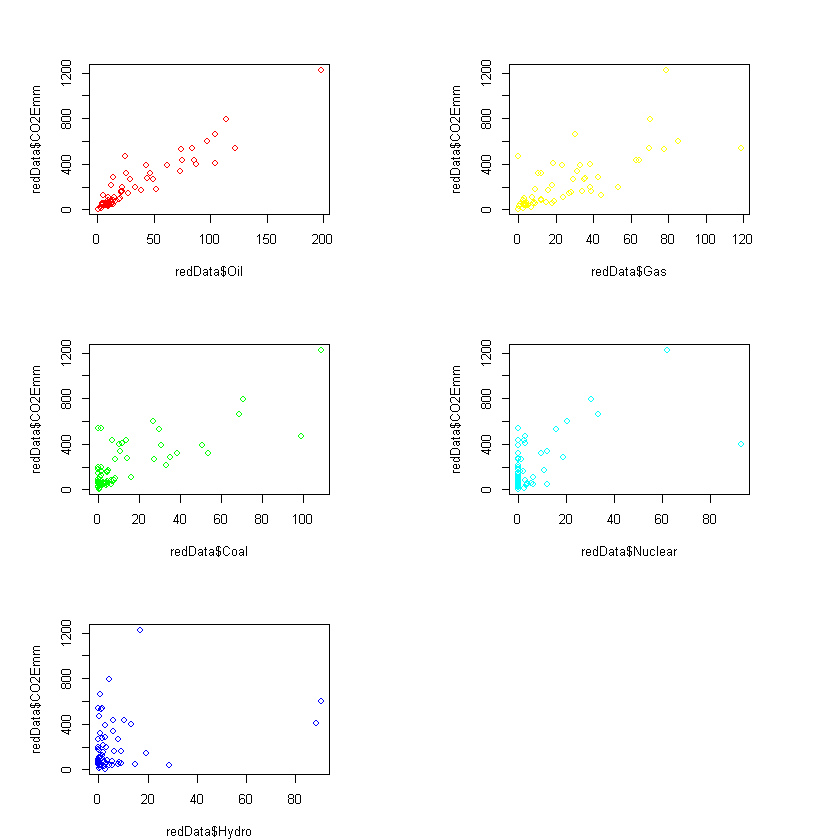

In [18]:
mycolors <- rainbow(6)
par(mfrow=(c(3,2)),pin=c(2, 1.25))
plot(redData$Oil,redData$CO2Emm,col=mycolors[1])
plot(redData$Gas,redData$CO2Emm,col=mycolors[2])
plot(redData$Coal,redData$CO2Emm,col=mycolors[3])
plot(redData$Nuclear,redData$CO2Emm,col=mycolors[4])
plot(redData$Hydro,redData$CO2Emm,col=mycolors[5])

Another possibility to visually analyze correlations between the parameters is the use of *scatterplotMatrix()* from the package *car*:

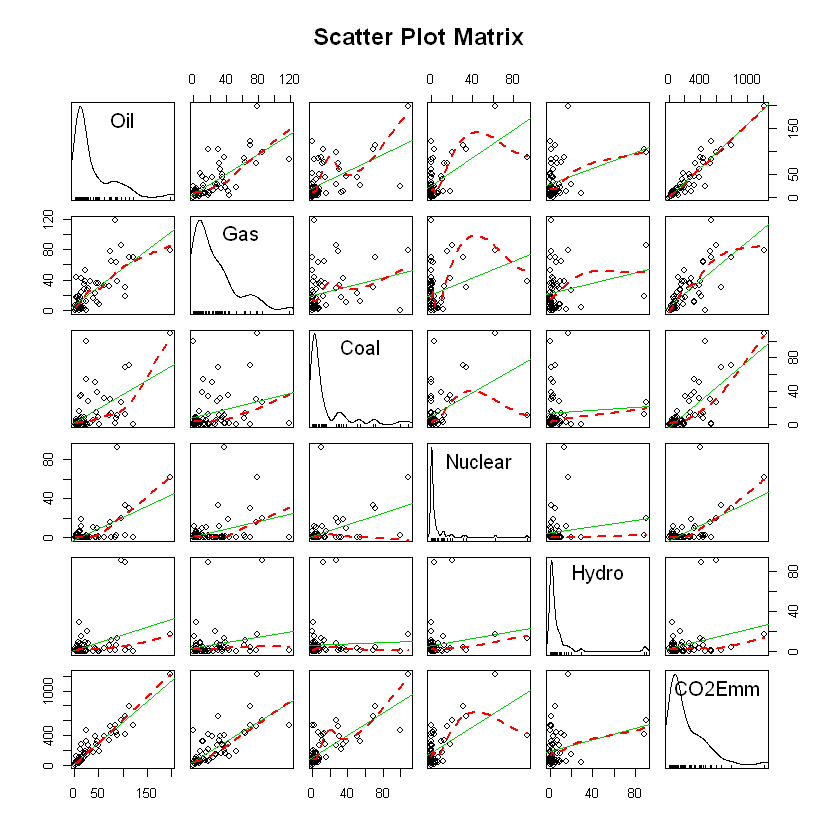

In [19]:
library(car)
scatterplotMatrix(redData, spread=FALSE, smoother.args=list(lty=2),
    main="Scatter Plot Matrix")

### Calculate the regression model

In [20]:
(linFitMult<-lm(CO2Emm ~ Oil + Gas + Coal + Nuclear + Hydro, data=redData))


Call:
lm(formula = CO2Emm ~ Oil + Gas + Coal + Nuclear + Hydro, data = redData)

Coefficients:
(Intercept)          Oil          Gas         Coal      Nuclear        Hydro  
  0.0167740    3.0689512    2.3475854    3.9614972   -0.0010719    0.0007234  


In [21]:
summary(linFitMult)


Call:
lm(formula = CO2Emm ~ Oil + Gas + Coal + Nuclear + Hydro, data = redData)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42627 -0.08321  0.01108  0.09363  0.30199 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  0.0167740  0.0308803    0.543    0.589    
Oil          3.0689512  0.0011352 2703.410   <2e-16 ***
Gas          2.3475854  0.0012722 1845.315   <2e-16 ***
Coal         3.9614972  0.0011608 3412.649   <2e-16 ***
Nuclear     -0.0010719  0.0018015   -0.595    0.554    
Hydro        0.0007234  0.0014588    0.496    0.622    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1669 on 55 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.261e+07 on 5 and 55 DF,  p-value: < 2.2e-16


<a id='multisteps'></a>
### Calculate Regression Parameters step by step
In order to understand the parameters returned by R's *lm()*-function and listed in the *summary()*-report, this subsection describes how these parameters are calculated. 

**Residuals:** This part plots the quartiles of the residuals $\epsilon_i=y_i-\hat{y}_i$ between the observed output variable $y_i$ and the predicted output $\hat{y}_i$ for all $N$ observations. Observed -, predicted- and residual values are arranged in the following dataframe. 

In [22]:
linFitMultDF<-data.frame(observed=redData$CO2Emm,predicted=fitted(linFitMult),residual=residuals(linFitMult))
head(linFitMultDF)

observed,predicted,residual
602.7,602.74248,-0.04248188
436.8,436.85276,-0.05276151
164.2,163.90307,0.29692818
409.4,409.47962,-0.07962391
70.3,70.56757,-0.26756771
57.9,57.62208,0.27792043


The *summary()*-report contains the quartiles of the residuals. They are calculated as follows:

In [23]:
quantile(residuals(linFitMult))

0%         25%         50%         75%        100% 
-0.42626605 -0.08320835  0.01108464  0.09363059  0.30199173

The standard error of the residuals is defined as
$$s_{Res}=\sqrt{\frac{1}{n-(1+k)}\sum\limits_{i=1}^{N} \epsilon_i},$$

In [24]:
(n<-length(linFitMultDF[,'residual']))
(k<-length(linFitMult$coefficients)-1)
(deg_freedom<- n-(1+k))
(Std_Error_Residuals<-sqrt(sum(linFitMultDF[,'residual']**2)/deg_freedom))

[1] 61

[1] 5

[1] 55

[1] 0.1669281

**Coefficients:** OLS estimates the coefficients $\beta_j$ by 
$$\boldsymbol{\beta} = (X^T X)^{-1} X^T \cdot \mathbf{y}.$$

*Build matrix $X$:*

In [25]:
redSources<-data.matrix(redData[,-6])
dim(redSources)
O<-matrix(rep(1,61),61,1)
X<-cbind(O,redSources)

[1] 61  5

*Calculate the coefficients $\boldsymbol{\beta}=(\beta_0,\beta_1,\ldots,\beta_k)$*:

In [26]:
XT<-t(X)
XInv<-solve(XT %*% X)
y_hat<-data.matrix(redData[,6])
(beta<-(XInv %*% XT) %*% y_hat)

,0.016774025
Oil,3.068951152
Gas,2.347585416
Coal,3.961497204
Nuclear,-0.001071921
Hydro,0.000723423


The *summary()* contains not only the estimated coefficients $\beta_j$, but also for each coefficient, the 
* standard error
* t-test statistic
* p-value

The following code snippets show, how these parameters are calculated.

*Standard Error of estimated coefficients:* Let $v_{jj}, \, j \in \{0,\ldots,k\} $ be the diagonal-elements of $(X^T X)^{-1}$, then the standard-error $s_{\beta_j}$ of coefficient $\beta_j$ is 
$$s_{\beta_j}=s_{Res} \sqrt{v_{jj}} \quad \mbox{ for } \quad j \in \{0,\ldots,k\}$$

In [27]:
(Std_Error_Coeffs<-Std_Error_Residuals*sqrt(diag(XInv)))

Oil         Gas        Coal     Nuclear       Hydro 
0.030880256 0.001135215 0.001272187 0.001160828 0.001801470 0.001458810

The *t-test-statistic of estimated coefficients* is calculated by
$$t_{\beta_j}=\frac{\beta_j}{s_{\beta_j}} \quad \mbox{ for } \quad j \in \{0,\ldots,k\}$$

In [28]:
(t_vals<-beta/Std_Error_Coeffs)

,0.5431958
Oil,2703.4095042
Gas,1845.3150351
Coal,3412.6491456
Nuclear,-0.5950257
Hydro,0.4958992


From the estimated coefficients, their standard error and their t-values a confidence intervall for each estimated coeffiecient can be defined as follows:
$$\beta_j \in [ \beta_j-s_{\beta_j}t_{\beta_j},\beta_j+s_{\beta_j}t_{\beta_j}] \quad \mbox{ for } \quad j \in \{0,\ldots,k\}$$

The t-values follow a t-distribution of $n-(1+k)$ degrees of freedom. From this distribution the p-value can be obtained.
The p-value of a coefficient is the probability for the null-hypothesis, which states, that the coefficient is 0. A very small p-value indicates, that the null-hypothesis can be rejected and the corresponding parameter is meaningful. Parameters with p-values $>0.05$ are statistically not significant. Hence, the p-values can be applied for feature selection.

*Calculate p-values:*

In [29]:
(pval<-2*(1-pt(abs(t_vals),df=deg_freedom)))

,0.5891898
Oil,0.0000000
Gas,0.0000000
Coal,0.0000000
Nuclear,0.5542667
Hydro,0.6219414


The p-values indicate, that *Nuclear* and *Hydro* are not relevant for the prediction of *CO2Emmission*.

**Coefficient of determination $R^2$:** This metric indicates the proportion of the variance in the output-variable that is predictable by the input-variable(s). It is calculated as follows:
$$R^2=1-\frac{SS_e}{SS_y}, \quad \mbox{ with } SS_e=\sum\limits_{i=1}^N(y_i-\hat{y}_i)^2, \quad SS_y=\sum\limits_{i=1}^N(y_i-\overline{y})^2, \quad \mbox{ and } \overline{y}=\frac{1}{N} \sum\limits_{i=1}^N y_i$$
The maximum value for $R^2$ is 1. It is achieved, if all predicted values $\hat{y}_i$ are equal to the observed values $y_i$. The mininum value of 0 appears for a model, which always predicts the mean $\overline{y}$ of the output-variable. For such a trivial model, no input-variable is required. 

The adjusted $R^2$ normalizes $R^2$ by taking into account the number of samples and the number of variables:
$$R^2_{adj}=1-\frac{SS_e}{SS_y}\frac{n-1}{n-(1+k)}$$

In [30]:
normedOutput<-linFitMultDF[,'observed']-mean(linFitMultDF[,'observed'])
(R2<-1-sum(linFitMultDF[,'residual']**2)/sum(normedOutput**2))
(R2adj<-1-sum(linFitMultDF[,'residual']**2)/sum(normedOutput**2)*(n-1)/(n-(1+k)))

[1] 0.9999995

[1] 0.9999995

## Linear Regression for nonlinear functions
In the example of [subsection Simple Linear Regression](#simpleLinReg), the linear function, which fits best (in terms of minimizing the sum of squared errors) to the given observations has been determined. However, it might be, that there is a polynomial function of higher degree, which yields a better fit than the best linear function. 

The same methods and concepts can be applied for fitting univariate polynomials of arbitrary degree $p$: 

$$ \hat{y} = f(x_1) = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \ldots + \beta_p x_1^p,$$

multivariate polynomials of arbitrary degree, such as:

$$ \hat{y} = f(x_1,x_2,\ldots,x_{k}) = \beta_0 + \beta_1 x_1 + \beta_2 x_3^2 + \beta_3 x_1 x_2 \cdots x_k + \beta_4 x_1 x_2^2 \ldots $$

or any other non-linear function, as long as all unknown coefficients $\beta_j$ appear only linearly
in the function. As long as this requirement is fulfilled we speak of *Linear Regression*.

E.g. a function of type
$$ f(x_1,x_2)=\beta_0+\beta_1 x_1^2+\beta_2 sin(x_1 x_2)+ \beta_3 log_{10}(x_1)$$
belongs to Linear Regression, but
$$ f(x_1,x_2)=\beta_0+x_1^{\beta_1}$$
does not.

In the example below the polynomial of degree 2, which best fits the given observations is calculated. As the exmaple shows the only difference is the construction of the input-observations-matrix $X$, which now contains also columns in which the input-variables are contained non-linearly.

### Calculate Polynomial Regression Model

In [31]:
(linFitPoly2<-lm(data=heartrate,Heartrate ~ Speed + I(Speed^2)))


Call:
lm(formula = Heartrate ~ Speed + I(Speed^2), data = heartrate)

Coefficients:
(Intercept)        Speed   I(Speed^2)  
     445.13      -140.19        17.04  


In [32]:
linFitPoly2DF<-data.frame(speed=heartrate$Speed,observed=heartrate$Heartrate,predicted=fitted(linFitPoly2),residual=residuals(linFitPoly2))
head(linFitPoly2DF)

speed,observed,predicted,residual
4.50,155.15,159.2651,-4.115150
5.00,166.68,170.0905,-3.410474
4.50,164.37,159.2651,5.104850
5.25,160.82,178.6973,-17.877268
4.50,148.51,159.2651,-10.755150
4.75,169.83,163.6131,6.216898


### Apply the regression model for prediction from new inputs

In [33]:
sR<-data.frame(Speed=seq(3.8,5.7,0.1))
(preds<-predict(linFitPoly2,sR))

1        2        3        4        5        6        7        8 
158.4194 157.5181 156.9575 156.7376 156.8584 157.3200 158.1222 159.2651 
       9       10       11       12       13       14       15       16 
160.7488 162.5732 164.7382 167.2440 170.0905 173.2777 176.8056 180.6742 
      17       18       19       20 
184.8835 189.4335 194.3242 199.5556

### Visualize the polynomial regression model
One possibility to vizualize the learned model is to define a range for input variables, calculate the response to this input variables by applying the *predict()*-method as demonstrated above and then apply ggplot2's *geom_line()* in order to plot outputs vs. input.

The second, and more comfortable, possibility is to apply the *geom_smooth()*-function. In this way there is no need to explicitely define inputs and calculate the corresponding outputs. 

The example below demonstrates, that both possibilities yield the same result, but the $geom_smooth()$-function provides more information, e.g. the standard error (if se=TRUE).

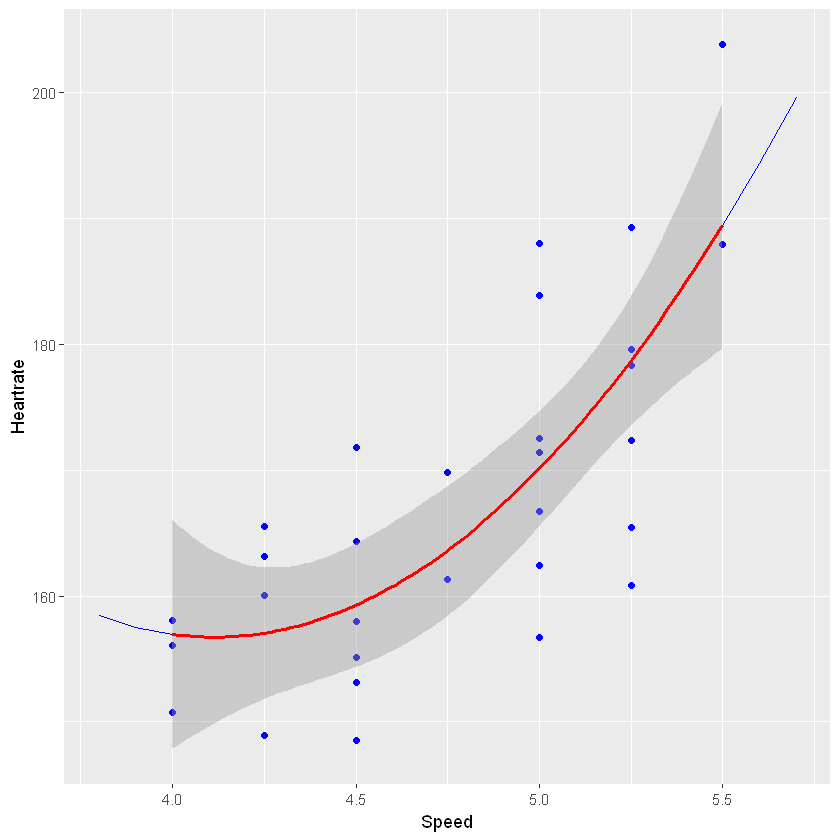

In [34]:
ggplot() +
geom_point(data=heartrate,aes(x=Speed,y=Heartrate),color="blue")+
geom_line(mapping=aes(x=sR,y=preds), color="blue")+
geom_smooth(data=heartrate,aes(x=Speed,y=Heartrate),method=lm, formula = y ~ x + I(x^2), color="red", se=T)

In [35]:
summary(linFitPoly2)


Call:
lm(formula = Heartrate ~ Speed + I(Speed^2), data = heartrate)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.8773  -6.1919  -0.6324   5.8612  17.9195 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  445.133    203.371   2.189   0.0374 *
Speed       -140.185     86.560  -1.620   0.1170  
I(Speed^2)    17.035      9.144   1.863   0.0734 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.127 on 27 degrees of freedom
Multiple R-squared:  0.569,	Adjusted R-squared:  0.537 
F-statistic: 17.82 on 2 and 27 DF,  p-value: 1.164e-05


*Verify the calculation of the coefficients $\boldsymbol{\beta}=(\beta_0,\beta_1,\ldots,\beta_k)$*:

In [36]:
redSources<-data.matrix(heartrate$Speed)
d<-dim(redSources)
O<-matrix(rep(1,d[1]),d[1],1)
#dim(O)
X<-cbind(O,redSources,redSources**2)
head(X)
y_hat<-data.matrix(heartrate$Heartrate)

1,4.50,20.2500
1,5.00,25.0000
1,4.50,20.2500
1,5.25,27.5625
1,4.50,20.2500
1,4.75,22.5625


In [37]:
XT<-t(X)
XInv<-solve(XT %*% X)
(beta<-(XInv %*% XT) %*% y_hat)

445.13301
-140.18535
17.03537


## Evaluation of Regression Models
Linear and generalized linear models make strong assumptions about the structure of data. In real world applications these assumptions often do not hold. For example if the noise (residuals) is not normally distributed and there exists a relatively large proportion of outliers, the fitted model can be improper. Hence it is important to check before and after the fitting process, if the available data satisfies the restrictions for applying the chosen regression method.

In the chapters above some methods to explore the given data before the fitting process have already been applied, e.g. the calculation of descriptive statistics and the visualisation of data, by e.g. scatterplots, boxplots or histograms. 

Now, methods for diagnosing regression models, after the modelling process are described.

### Anscombe's Quartet: One model fits all?
The necessity for regression diagnostics can be demonstrated by the famous [Anscombe quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). The quartet consists of 4 different datasets, each with one input- and one output variable. Despite the obvious difference between the datasets, they all yield the exactly same linear regression model. Each having the same coefficients, the same Sum of Squared Errors (Residual Standard Error), the same $R^2$- and the same $F$-statistic. This is demonstrated in the code cells below.  

**Load Anscombe's quartet data:**

In [38]:
anscombe<-read.csv(file="../data/Anscombe.txt", header=F,sep="\t",dec = ",")
colnames(anscombe)<-c('x1','y1','x2','y2','x3','y3','x4','y4')
anscombe

x1,y1,x2,y2,x3,y3,x4,y4
10,8.04,10,9.14,10,7.46,8,6.58
8,6.95,8,8.14,8,6.77,8,5.76
13,7.58,13,8.74,13,12.74,8,7.71
9,8.81,9,8.77,9,7.11,8,8.84
11,8.33,11,9.26,11,7.81,8,8.47
14,9.96,14,8.10,14,8.84,8,7.04
6,7.24,6,6.13,6,6.08,8,5.25
4,4.26,4,3.10,4,5.39,19,12.50
12,10.84,12,9.13,12,8.15,8,5.56
7,4.82,7,7.26,7,6.42,8,7.91


**Visualize data and the fitted linear regression model:**

In [39]:
a1<-ggplot(data=anscombe, aes(x=x1, y=y1)) +
geom_point(color="blue")+
geom_smooth(method=lm , color="red", se=T)

a2<-ggplot(data=anscombe, aes(x=x2, y=y2)) +
geom_point(color="blue")+
geom_smooth(method=lm , color="red", se=T)

a3<-ggplot(data=anscombe, aes(x=x3, y=y3)) +
geom_point(color="blue")+
geom_smooth(method=lm , color="red", se=T)

a4<-ggplot(data=anscombe, aes(x=x4, y=y4)) +
geom_point(color="blue")+
geom_smooth(method=lm , color="red", se=T)

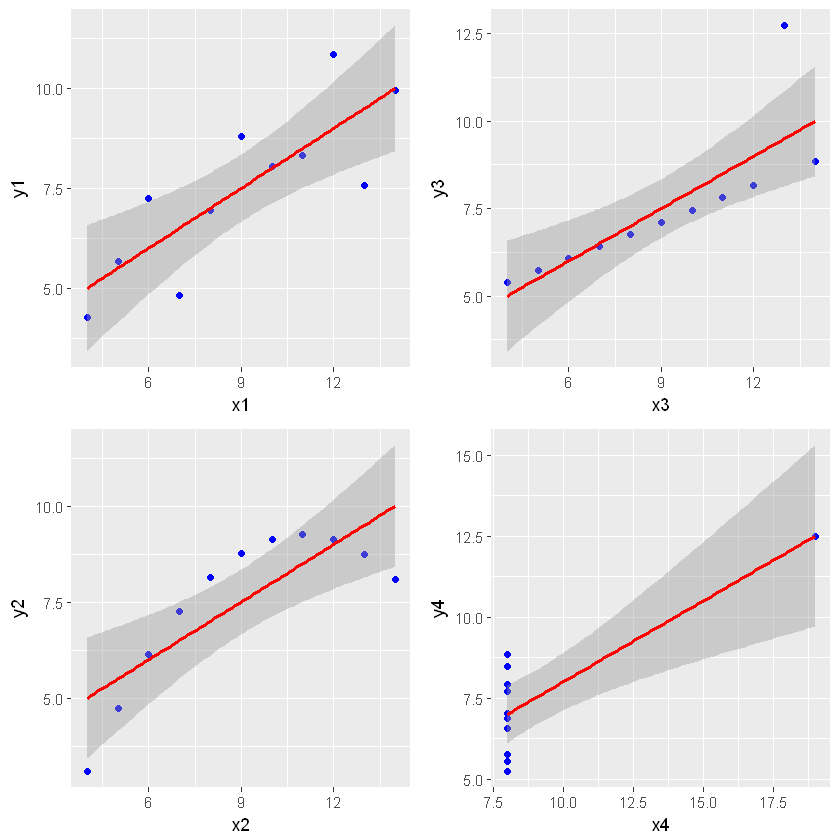

In [52]:
multiplot(a1, a2, a3, a4, cols=2) #multiplot-function is defined below

**Regression Summary of each model:**

In [41]:
fit1<-lm(data=anscombe,y1~x1)
summary(fit1)


Call:
lm(formula = y1 ~ x1, data = anscombe)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92127 -0.45577 -0.04136  0.70941  1.83882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0001     1.1247   2.667  0.02573 * 
x1            0.5001     0.1179   4.241  0.00217 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6665,	Adjusted R-squared:  0.6295 
F-statistic: 17.99 on 1 and 9 DF,  p-value: 0.00217


In [42]:
fit2<-lm(data=anscombe,y2~x2)
summary(fit2)


Call:
lm(formula = y2 ~ x2, data = anscombe)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9009 -0.7609  0.1291  0.9491  1.2691 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    3.001      1.125   2.667  0.02576 * 
x2             0.500      0.118   4.239  0.00218 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6662,	Adjusted R-squared:  0.6292 
F-statistic: 17.97 on 1 and 9 DF,  p-value: 0.002179


In [43]:
fit3<-lm(data=anscombe,y3~x3)
summary(fit3)


Call:
lm(formula = y3 ~ x3, data = anscombe)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1586 -0.6146 -0.2303  0.1540  3.2411 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0025     1.1245   2.670  0.02562 * 
x3            0.4997     0.1179   4.239  0.00218 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.236 on 9 degrees of freedom
Multiple R-squared:  0.6663,	Adjusted R-squared:  0.6292 
F-statistic: 17.97 on 1 and 9 DF,  p-value: 0.002176


In [44]:
fit4<-lm(data=anscombe,y4~x4)
summary(fit4)


Call:
lm(formula = y4 ~ x4, data = anscombe)

Residuals:
   Min     1Q Median     3Q    Max 
-1.751 -0.831  0.000  0.809  1.839 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0017     1.1239   2.671  0.02559 * 
x4            0.4999     0.1178   4.243  0.00216 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.236 on 9 degrees of freedom
Multiple R-squared:  0.6667,	Adjusted R-squared:  0.6297 
F-statistic:    18 on 1 and 9 DF,  p-value: 0.002165


### Diagnostics of the 4 linear regression models

Since no effective difference can be observed in the *summary()*-report of the 4 different models, we have to apply other methods to determine the different suitability of the models w.r.t. the 4 datasets. 

In [45]:
library(car)
#outlierTest(fit1)
#outlierTest(fit2)
#outlierTest(fit3)
#outlierTest(fit4)

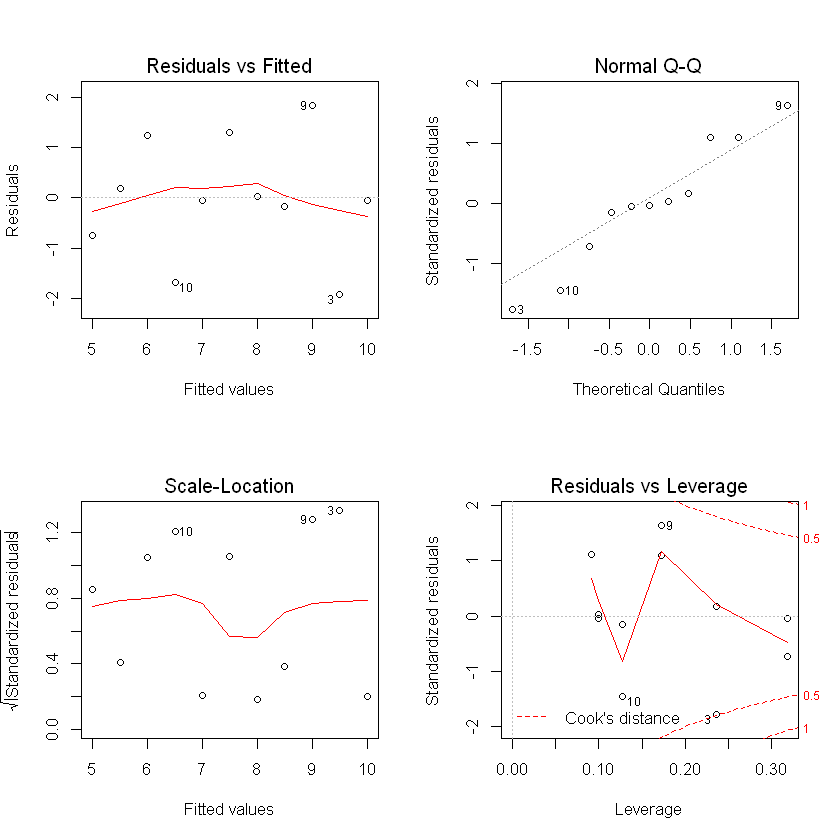

In [46]:
par(mfrow=c(2,2))
plot(fit1)

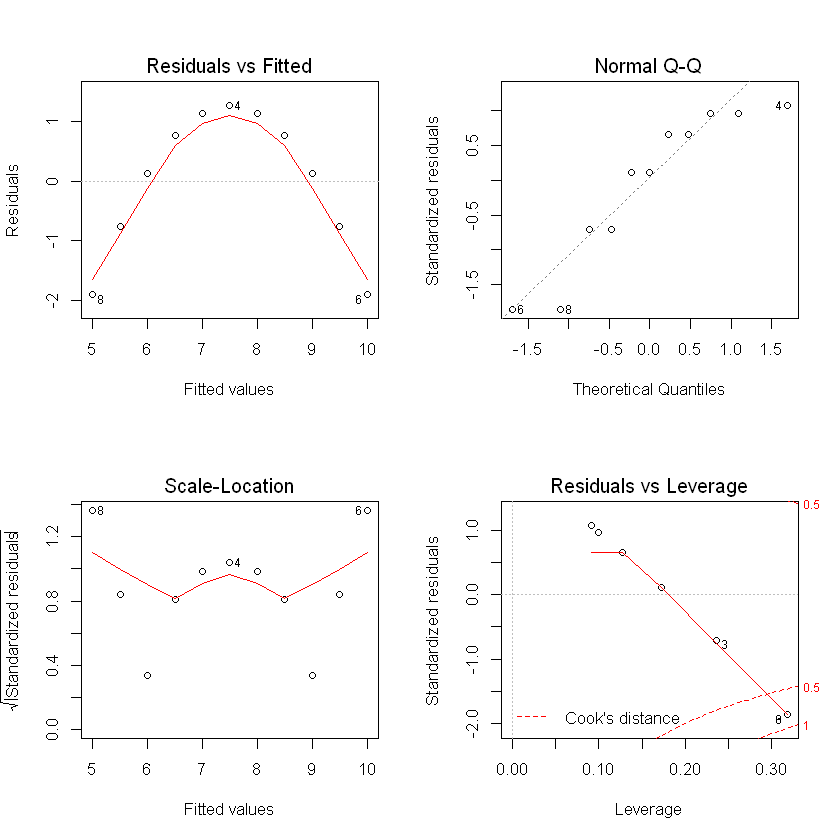

In [47]:
par(mfrow=c(2,2))
plot(fit2)

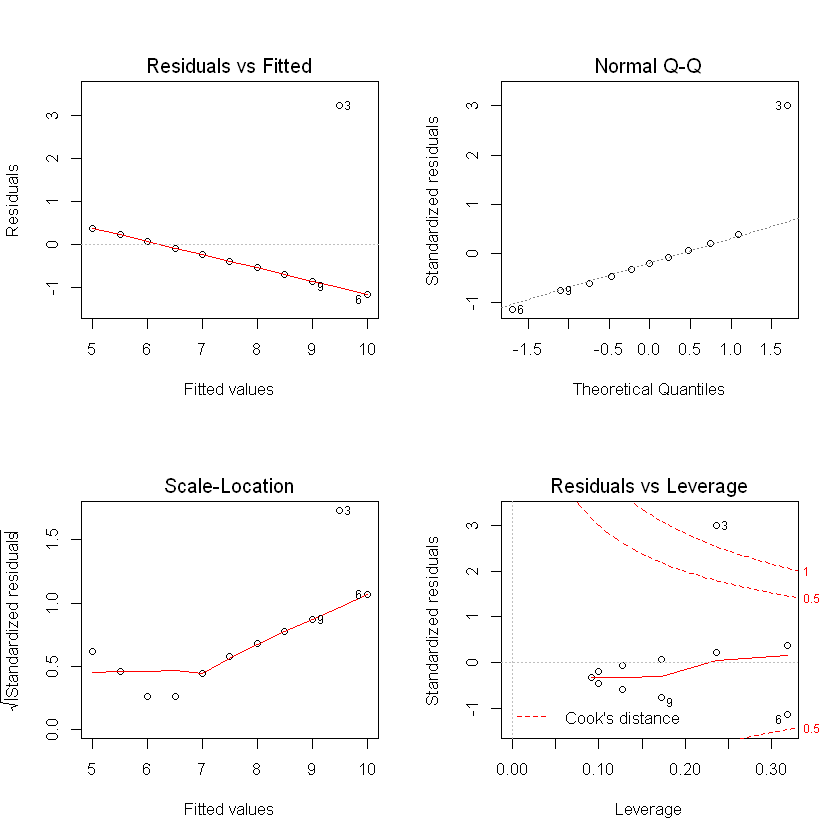

In [48]:
par(mfrow=c(2,2))
plot(fit3)

Warning message:
"not plotting observations with leverage one:
  8"Warning message:
"not plotting observations with leverage one:
  8"

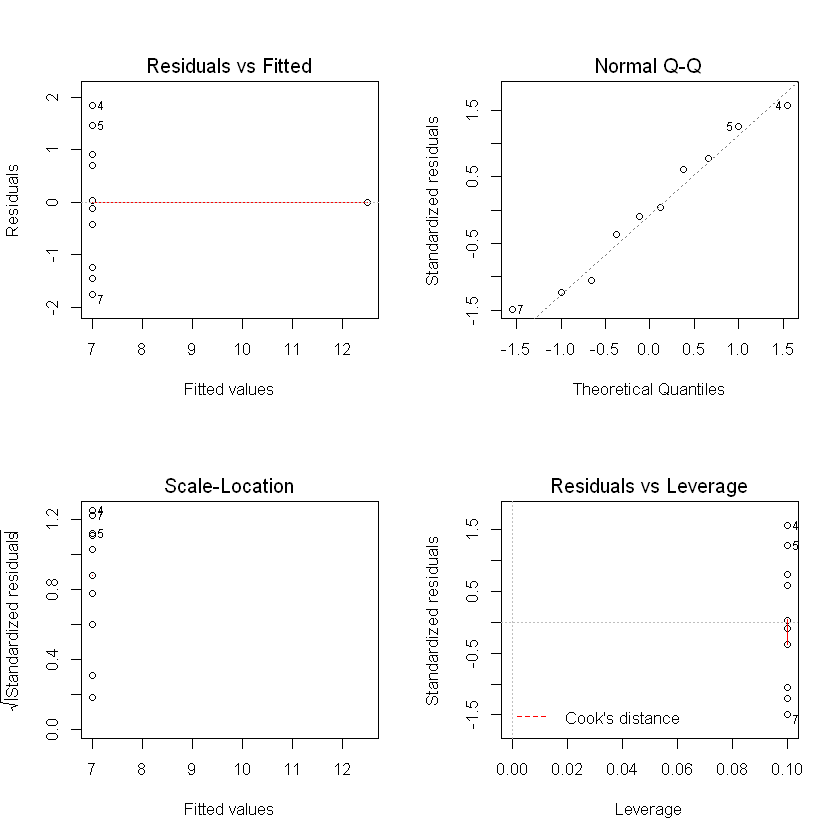

In [49]:
par(mfrow=c(2,2))
plot(fit4)

In [53]:
# Source: http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}